In [54]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [55]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
print(X_train.shape)
y_train.shape

(60000, 28, 28)


(60000,)

In [57]:
print(X_test.shape)
y_test.shape

(10000, 28, 28)


(10000,)

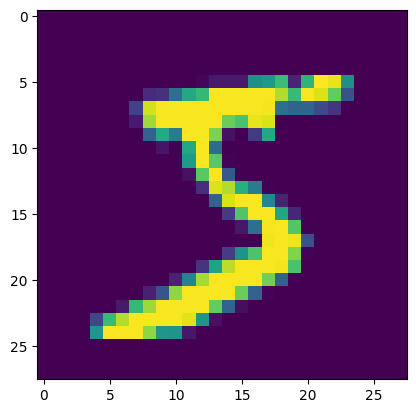

In [58]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [59]:
X_train = X_train/255
X_test = X_test/255

In [60]:
X_train[0].shape

(28, 28)

In [61]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [64]:
history = model.fit(X_train, y_train,batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6636 - loss: 1.3609 - val_accuracy: 0.9275 - val_loss: 0.3018
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9153 - loss: 0.3176 - val_accuracy: 0.9455 - val_loss: 0.2006
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9368 - loss: 0.2260 - val_accuracy: 0.9557 - val_loss: 0.1625
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9495 - loss: 0.1785 - val_accuracy: 0.9643 - val_loss: 0.1329
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9592 - loss: 0.1448 - val_accuracy: 0.9662 - val_loss: 0.1159
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9650 - loss: 0.1227 - val_accuracy: 0.9702 - val_loss: 0.1037
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9705 - loss: 0.1019 - val_accuracy: 0.9728 - val_loss: 0.0962
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9748 - loss: 0.0897 - val_accuracy: 0.

In [65]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.974

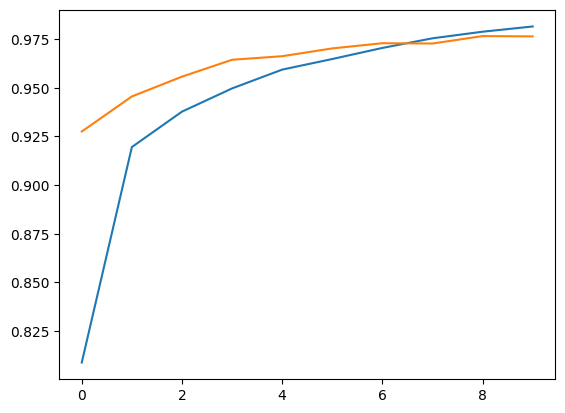

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

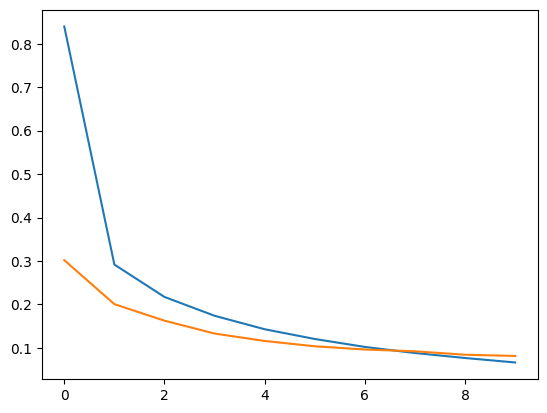

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [69]:
prob = model.predict(X_test[3].reshape(1,28,28))
print(prob)
x = prob.argmax(axis=1)[0]
print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[9.9688041e-01 3.0794974e-05 1.0058451e-03 5.7259615e-05 5.9623086e-05
  3.3081774e-04 8.2194956e-04 1.3841131e-04 8.0317868e-06 6.6682568e-04]]
0


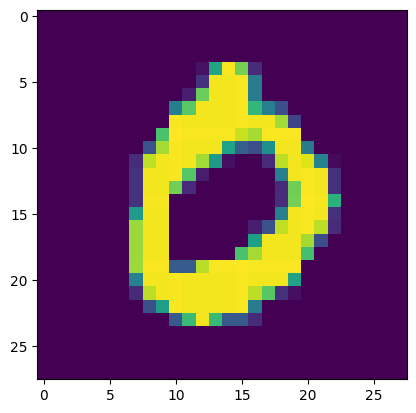

In [70]:
plt.imshow(X_test[3])

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

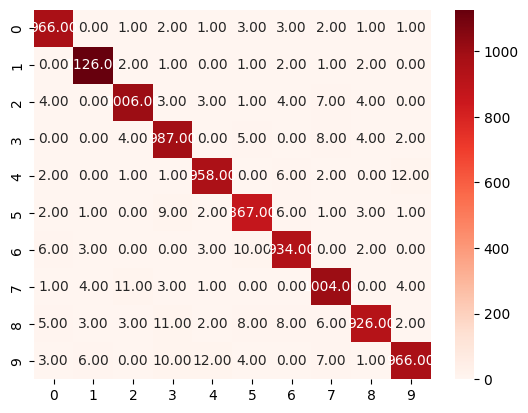

In [72]:
import seaborn as sns
sns.heatmap(cm, annot= True, fmt = '0.2f', cmap="Reds",)

In [73]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("classification Report : \n",report)

classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

